##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 3 - matplotlib </span>  

# Enkle grafer

Det er fint å kunne lage funksjoner i Python, men det er enda bedre å *se* dem. Vi skal nå se på hvordan vi kan tegne resultatet av funksjoner i et diagram ved hjelp av pakken `matplotlib`. 

Ofte ønsker vil å bruke matplotlib til å vise oss sammenhenger i data vi har hentet inn. Når vi importerer data til Python bruker vi vanligvis pakken `pandas`. Vi kommer sener tilbake til hvordan vi arbeider med data i `pandas`, så foreløpig skal vi ikke gjøre noe mer enn å importere og bruke dataene i `matplotlib`. 

Vi starter derfor med å *importere* `matplotlib`, `numpy` og `pandas`:

#### Eksempel 1:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Plotte tall

Vi starter med å plotte følgende tre kooridnater: (4,8), (7,2) og (2,6). For å gjøre det lager vi én variabel med x-koordinatene, og én med y-koordiantene. Funksjonen `plot`lager en figur med linjer mellom hvert av punktene:

#### Eksempel 2:

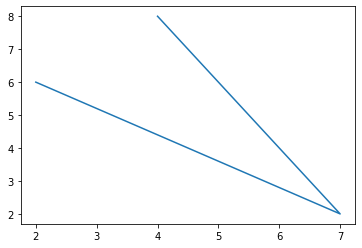

In [2]:
x=[4,7,2]
y=[8,2,6]
plt.plot(x,y)

Vi kan legge til punktene, så vi ser dem tydligere, med funksjonen `scatter`:

#### Eksempel 3:

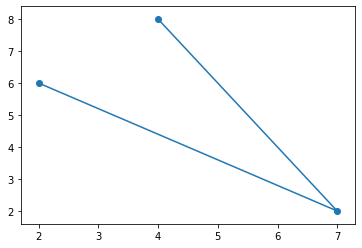

In [3]:
plt.plot(x,y)
plt.scatter(x,y)

... og vi kan plotte kun punktene:


#### Eksempel 4:

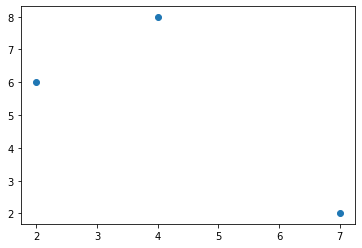

In [4]:
plt.scatter(x,y)

### Plotte en funksjon

Du kan plotte en funksjon ved å definere en liste med tall, og så definere en funksjonsverdi for hvert element i listen. `range`-funksjonen har vi vært borte i før, og range(1,50) gir oss en liste over heltall fra 1 til 50. Så regner vi ut logaritmen av disse tallene og setter det inn som y-verdier:

#### Eksempel 5:

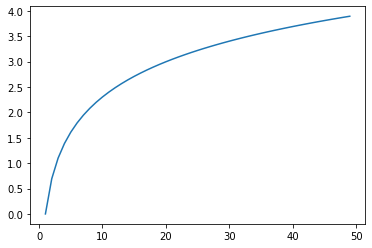

In [5]:
x=range(1,50)
y=np.log(x)
plt.plot(x,y)

### Importere data

Men det er morsommere å jobbe med virkelige data. Import av data til `pandas` gjøres enkelt med funksjonen `read_csv`. Dersom du har lastet ned siste versjon av notebooks, ligger den en fil i mappen "data" som heter schooling-gdp.csv. (kilde: https://ourworldindata.org/grapher/correlation-between-mean-years-of-schooling-and-gdp-per-capita). Denne filen inneholder data på BNP og utdanningsnivå for endel land i 2010. Den kan du lese inn slik:

#### Eksempel 6:

In [6]:
df=pd.read_csv('./data/schooling-gdp.csv')

La oss nå se på dataene, ved å kjøre en kode med kun navnet på variabelen som holder dataene:

#### Eksempel 7:

In [7]:
df

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.68000,11.65,4886000
1,Kuwait,KWT,67029.52300,6.39,2992000
2,Luxembourg,LUX,57882.80900,11.33,508000
3,Switzerland,CHE,55688.02000,12.92,7809000
4,United States,USA,49500.62900,13.24,309011008
...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000
102,Mozambique,MOZ,969.23077,2.03,23532000
103,Niger,NER,845.86932,1.95,16464000
104,Liberia,LBR,786.67023,4.35,3891000


Vi ser at vi har fire variabler: Land, Landkode, BNP_per_capita (BNP per innbygger), Utdanning og Befolkning. BNP er "brutto nasjonalprodukt" som måler hvor mye som produseres i et land i løpet av et år. BNP_per_capita viser altså hvor mye hver person i landet produserer hvert år i gjennomsnitt.  

Vi kan hente opp hver serie ved å skrive navnet til variabelen som holder dataene, altså `df`, etterfulgt av en klammeparentes med navnet på dataserien vi ønsker, for eksempel 'BNP':

#### Eksempel 8:

In [8]:
df['BNP_per_capita']

0      73262.68000
1      67029.52300
2      57882.80900
3      55688.02000
4      49500.62900
          ...     
101      972.04572
102      969.23077
103      845.86932
104      786.67023
105      634.97137
Name: BNP_per_capita, Length: 106, dtype: float64

Skal vi plotte data, gjør vi akkurat som i Eksempel 2; vi legger inn x- og y-verdier i plotfunksjonen, og disse verdiene henter vi med klammeparentes etter datavariabelen. Her plotter vi BNP langs x-aksen og utdanning langs y-aksen. Vi bruker `scatter`-funksjonen, siden det ikke gir noen mening å tegne streker mellom disse punktene:

#### Eksempel 9:

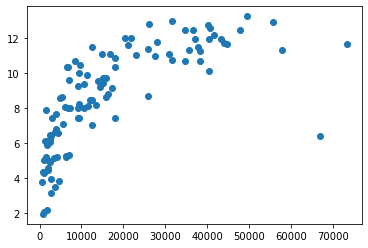

In [9]:
plt.scatter(df['BNP_per_capita'], df['Utdanning'])

Om vi ser på log-funksjonen i Eksempel 5, så ser vi at fordelingen av punkter ligner litt på den, så la oss legge inn logaritmen som funksjon av BNP. Vi må justere den litt, men som du ser passer den ganske bra! Det ser altså ut til at det er en sammenheng mellom utdanningsnivå og BNP, men sammenhengen blir svakere desto høyere BNP er. 

#### Eksempel 10:

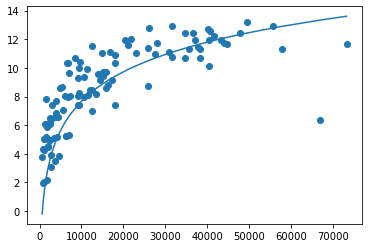

In [10]:
bnp_per_capita=np.array(df['BNP_per_capita'])
utdanning=np.array(df['Utdanning'])

plt.scatter(bnp_per_capita, np.array(df['Utdanning']))
plt.plot(   bnp_per_capita, np.log(bnp_per_capita+100)*3-20)

## Eksempel med bankinnskudd og bruk av subplots()

Vi begynner med å lage funksjonen for et lån fra forrige forelesning. Vi husker at om banken din legger til renten `n` ganger i året, og renten er `r`, så er bankinnskuddet på `x` om `T` år gitt som  $x\cdot (1+\frac{r}{n})^{T\cdot n}$, som vi kan programmere slik:

#### Eksempel 11:

In [11]:
def account_balance(x,r,T,n):
    return x*(1+r/n)**(T*n)

Vi skal bruke en litt annen fremgangsmåte for å plotte denne funksjonen, enn i eksemplene over. Vi skal først lage et figurobjekt og et akseobjekt med funksjonen `fig,ax=plt.subplots()`. Vi kan så bruke objektet `ax` til å lage etiketter til aksene og plotte flere grafer oppå hverandre. Dette er altså en littegran mer avansert bruk av `matplotlib`. Fordelen er at vi kan legge til nye elementer i eksisterende plot, uten å skrive hele koden på nytt når vi kjører i en annen celle. 

Om renten er 20%=0.2, innskuddet er 100 som forrentes årlig, så kan vi tegne innskuddsfunksjonen for 10 år som

#### Eksempel 12:

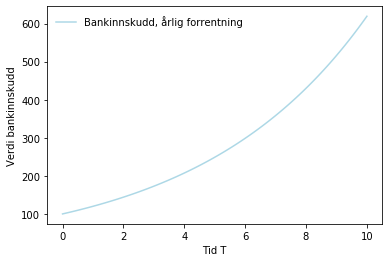

In [12]:
#1. Checking developement over 10 years, with 100 data points
T = np.linspace(0,10,100)

#2. initiating the plot:
fig,ax=plt.subplots()

#3. adding axis lables:
ax.set_ylabel('Verdi bankinnskudd')
ax.set_xlabel('Tid T')

#4. plotting the function:
ax.plot(T, account_balance(100,0.2,T,1),          label='Bankinnskudd, årlig forrentning',    color='lightblue')

#5. adding legend in the upper left corner:
ax.legend(loc='upper left',frameon=False)

Det som skjer over er at vi

1. Definerer for hvilke verdier vi skal tegne og hvor mange punkter. Her ser vi at vi tegner hundre punkter i intervallet 0 til 10
2. Lager to objekter `fig` og `ax` som brukes til å tegne grafene. 
3. Definerer hva som skal være på x og y-aksen
4. Plotter ved å sette inn punktene `T` og funksjonen `account_balance(100,0.2,T,1)` inn i funksjonen `ax.plot`
5. lager ettikett og plasserer den oppe til venstre

Som i forrige forelesning kan det være interessant å sammenligne ulike hyppigheter for å legge til renter. Vi legger derfor til fire grafer til, i samme figur, med henholdsvis kvartalsvis, månedlig, ukentlig og daglig forrentning:

#### Eksempel 13:

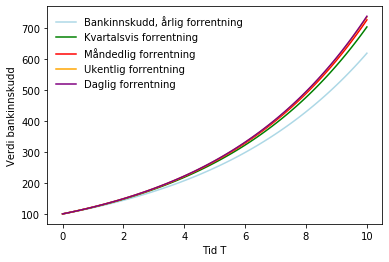

In [13]:
#plotting four graphs with different compounding:
ax.plot(T,       account_balance(100,0.2,T,4),          label='Kvartalsvis forrentning',     color='green')
ax.plot(T,       account_balance(100,0.2,T,12),         label='Måndedlig forrentning',       color='red')
ax.plot(T,       account_balance(100,0.2,T,52),         label='Ukentlig forrentning',        color='orange')
ax.plot(T,       account_balance(100,0.2,T,365),        label='Daglig forrentning',          color='purple')
ax.legend(loc='upper left',frameon=False)
fig

Hva synes du, har hyppigheten har det mye å si hvor ofte vi legger til renter?

For å svare på det kan det være interessant å kobinere grafene med en utregning regne av hva du taper på hyppig forretning. La oss se på differansen mellom daglig og ukentlig, og ukentlig mot årlig:

#### Eksempel 14:

In [14]:
#printing the nummerical difference between annual and daily compounding:
print(f"""Differansen mellom daglig og ukentlig forrentning i løpet av 20 år er {
    np.round(
    account_balance(100,0.2,10,365)-account_balance(100,0.2,10,52)
        ,2)
}
""")
print(f"""Differansen mellom ukentlig og årlig forrentning i løpet av 20 år er {
    np.round(
    account_balance(100,0.2,10,52)-account_balance(100,0.2,10,1)
        ,2)
}
""")

Differansen mellom daglig og ukentlig forrentning i løpet av 20 år er 2.42

Differansen mellom ukentlig og årlig forrentning i løpet av 20 år er 116.9



Vi ser altså at å gå fra ukentlig til daglig forrentning ikke har så mye å si, men forskjellen fra ukentlig til årlig er ganske stor. 

I stedet for å regne ut med daglig forrentning kan vi bruke kontinuerlig forrentning. SOm vi husker fra forrige forelesnig, betyr det at vi bruker eksponentialfunksjonen:

#### Eksempel 15:

In [15]:
#defining the continous compounding function:
def account_balance_exponential(x,r,T):
    return x*np.exp(r*T)

La oss plotte kontinuerlig og *sammenligne* med daglig forrentning. Legg merke til første linje, som sørger for at vi starter med "blanke ark". 

#### Eksempel 16:

Differansen mellom årlig og kontinuerlig forrentning etter 20 år er 0.4


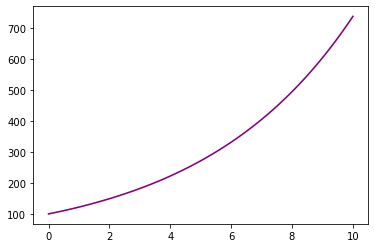

In [16]:
#Starting with a blank graph by defining ax and fig again:
fig,ax=plt.subplots()

#adding continious compounding to the prevoius plot
ax.plot(T,       account_balance_exponential(100,0.2,T),label='Kontinuerlig forrentet',      color='pink')
ax.plot(T,       account_balance(100,0.2,T,365),        label='Daglig forrentning',          color='purple')

#printing the nummerical difference between continious and daily compounding:
print(f"""Differansen mellom årlig og kontinuerlig forrentning etter 20 år er {
    np.round(
   account_balance_exponential(100,0.2,10)- account_balance(100,0.2,10,365)
        ,2)
}""")

Vi ser at selv om det lønner seg å forrente ofte, er det liten forskjell mellom daglig og kontinuerlig forretning. Likevel benytter vi ofte kontinuerlig forrentning i økonomifaget. Årsaken til det er at eksponenten og logaritmen er mye enklere å jobbe med matematisk enn prosentvis avkastning. Nummerisk er imidlertid forskjellen liten så lenge hyppigheten er høy.  

# Googling

Det er umulig å huske hvordan alle funksjonene til alle pakkene i Python skal brukes, ikke minst fordi det er en konstant uvikling av slike pakker. Heldigvis lages de fleste pakker på en *pytonsk* måte, hvilket vil si at funksjoner og objekter fra forskjellige pakker og forfattere skal oppføre seg forutsigbart og ensartet. Helt selvforklarende er imidlertid ingen pakker. 

Den beste måten å finne ut hvordan du skal bruke en pakke, er derfor å google det du lurer på. Dette må gjøres på engelsk, siden stort sett alt av forum og dokumentasjon er på engelsk. 

La oss derfor ta matplotlib som eksempel. La oss si at du har glemt denne forelesningen og derfor skal finne ut hvordan du plotter en linje med matplotlib. Forsøk å google `"matplotlib plot function"`. I skrivende stund i første treff på Google (det er ikke alltid det første treffet er best), finner du denne koden på [scriptverse.academy](https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html):


#### Eksempel 17:

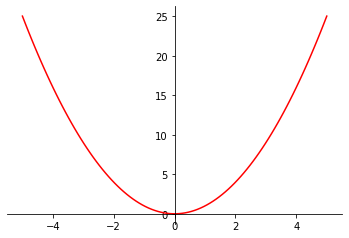

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

Vi ser umiddelbart at det er endel ting vi ikke trenger for et enkelt plott, så vi sletter alt under kommentaren `# setting the axes at the centre` (frem til `# plot the function`). Vi trenger heller ikke definisjonen av funksjonen under kommentaren `# the function, which is y = x^2 here`, siden vi har definert våre egne funksjoner over, så vi sletter den også.  Så bytter vi ut alle `x`'er med `T` og velger å sette inn funksjonen for daglig forretning `account_balance(100,0.2,T,365)` inn i `plot`-funksjonen. Tilslutt bytter vi ut startpunktet i `linspace`-funksjonen med `0`. Da får vi følgende kode:

#### Eksempel 18:

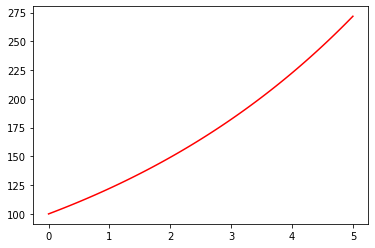

In [18]:
#From https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
T = np.linspace(0,5,100)

# plot the function
plt.plot(T,account_balance(100,0.2,T,365), 'r')

# show the plot
plt.show()

Vi ser altså her at ved å bruke eksempler som vi kan endre på, så kan vi raskt finne ut hvordan en pakke fungerer. 

*HUSK: Bruker du andres kode, skal det kommenteres i koden!

## Eksempel med tilbud og etterspørsel

Vi definerer først tilbud og etterspørsel slik vi gjorde i forrige forelesning, men med litt andre tall:

#### Eksempel 19:

In [19]:
def supply(x):
    return (x**2)*(1/250)
    
def demand(x):
    return 3000/(100+x)

1/0.004

250.0

Vi skal nå finne likhet mellom tilbud og etterspørsel grafisk ved å tegne opp begge funksjonene i samme diagram:

#### Eksempel 20:

(-2, 32)

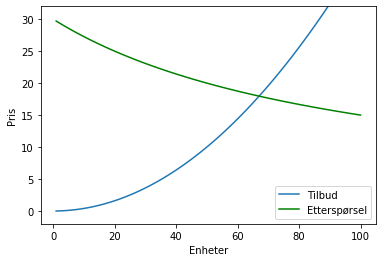

In [20]:
#drawing 100 points in the interval 0.0 to 100
x = np.linspace(1,100,100)

#drawing supply
plt.plot(x,supply(x),label='Tilbud')

#drawing demand
plt.plot(x,demand(x),color='green',label='Etterspørsel')

#adding legend:
plt.legend(loc='lower right')

#setting the axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

#setting the range of y values (the price) to be between 0 and 30, so that we can more
#easily see the equilibrium price
plt.ylim((-2,32))

## Oppgaver

#### Oppgave 1:
1. Forsøk å finne prisen og mengden i likevekt (der tilbud=etterspørsel) ved å bruke informasjonen i figuren
2. Gjør endringer i tilbud og etterspørselsfunksjonene og finn likevekt for disse. 

#### Oppgave 2:

Finn på noen koordinater selv, som du plotter
1. som punkter
2. med linjer mellom
3. med både linjer og punkter.

#### Oppgave 3:

1. Plott BNP_per_capita mot Befolkning
2. Plott Utdanning mot Befolkning

#### Oppgave 4:

1. Plot `np.log(x)`
2. Plot `np.cos(x)`
3. Plot `np.sin(x)`
4. Plot `np.exp(-x)`
5. Lag en funksjon selv, og plott denne.

#### Oppgave 5:

En fabrikk produserer $x$ enheter. Kostnaden per enhet er 5 kroner, og i tillegg øker kostnaden med 5 øre per produsert enhet. Hver enhet koster dermed $5+0.05 \cdot x$. Bedriften selger produksjonen $x$ til en pris $p$. Fortjenesten er dermed differansen mellom inntekter $p\cdot x$ og totale kostnader $x \cdot (5+0.05 x)$. 

I alle oppgavene under skal du plotte i intervallet 0 til 100 (`x=p=np.linspace(0,100,100)`).

1. Lag en funksjon `cost(x)` for totale kostnader, gitt en produksjonsmengde $x$, og 
2. Lag en funksjon `profit(x,p)` for fortjenesten, gitt en produksjonsmengde $x$ og pris $p$. 
3. Sett `x`til 5 i funksjonen du lagde over i 2., og plott fortjenesten som en funksjon av prisen. 
4. Sett `p`til 10 i funksjonen du lagde over i 2., og plott fortjenesten som en funksjon av produsert mengde. 
5. Hva er optimal produsert mengde?

Husk å lag etiketter for aksene!



##### [< Forrige](2%20-%20funksjoner.ipynb)     |     [Neste >](4%20-%20lister%2C%20oppslag%20og%20numpy.ipynb)